In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

43


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48160 stdev: 0.09050
Best fitness: 0.71058 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.221
Mean genetic distance 2.935, standard deviation 0.488
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.710 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53002 stdev: 0.08992
Best fitness: 0.71058 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.187
Mean genetic distance 3.052, standard deviation 0.503
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.238 sec (15.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55504 stdev: 0.08569
Best fitness: 0.71058 - size: (2, 13) - species 24 - id 158
Average adjusted fitness: 0.188
Mean genetic distance 3.086, standard deviation 0.502
Population of 200 members in 31 speci

Population's average fitness: 0.62719 stdev: 0.09447
Best fitness: 0.77365 - size: (7, 25) - species 28 - id 2937
Average adjusted fitness: 0.303
Mean genetic distance 3.218, standard deviation 0.482
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 11.192 sec (10.597 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61352 stdev: 0.10316
Best fitness: 0.77365 - size: (7, 25) - species 28 - id 2937
Average adjusted fitness: 0.237
Mean genetic distance 3.225, standard deviation 0.497
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 11.821 sec (10.709 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62330 stdev: 0.09800
Best fitness: 0.77365 - size: (7, 25) - species 28 - id 2937
Average adjusted fitness: 0.224
Mean genetic distance 3.276, standard deviation 0.477
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 11.370 sec (10.789 average)

 

Population's average fitness: 0.59992 stdev: 0.09167
Best fitness: 0.72604 - size: (6, 20) - species 4 - id 2432
Average adjusted fitness: 0.284
Mean genetic distance 3.272, standard deviation 0.468
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 10.269 sec (10.012 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60137 stdev: 0.09073
Best fitness: 0.72604 - size: (6, 20) - species 4 - id 2432
Average adjusted fitness: 0.244
Mean genetic distance 3.269, standard deviation 0.489
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.024 sec (10.060 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60103 stdev: 0.09309
Best fitness: 0.73098 - size: (6, 19) - species 4 - id 2698
Average adjusted fitness: 0.213
Mean genetic distance 3.241, standard deviation 0.492
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 10.384 sec (10.119 average)

 ***

Population's average fitness: 0.57710 stdev: 0.06888
Best fitness: 0.70068 - size: (4, 18) - species 36 - id 1648
Average adjusted fitness: 0.233
Mean genetic distance 3.206, standard deviation 0.482
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.721 sec (7.616 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57556 stdev: 0.06677
Best fitness: 0.70068 - size: (4, 18) - species 36 - id 1648
Average adjusted fitness: 0.158
Mean genetic distance 3.224, standard deviation 0.481
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.862 sec (7.706 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57891 stdev: 0.07092
Best fitness: 0.70068 - size: (4, 18) - species 44 - id 1648
Average adjusted fitness: 0.160
Mean genetic distance 3.223, standard deviation 0.476
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.634 sec (7.738 average)

 ******

Population's average fitness: 0.54749 stdev: 0.06728
Best fitness: 0.71800 - size: (3, 14) - species 19 - id 678
Average adjusted fitness: 0.164
Mean genetic distance 3.207, standard deviation 0.486
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.474 sec (6.956 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55978 stdev: 0.06585
Best fitness: 0.73469 - size: (4, 15) - species 19 - id 1187
Average adjusted fitness: 0.115
Mean genetic distance 3.195, standard deviation 0.482
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.669 sec (7.045 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56359 stdev: 0.06978
Best fitness: 0.73469 - size: (4, 15) - species 19 - id 1187
Average adjusted fitness: 0.162
Mean genetic distance 3.193, standard deviation 0.479
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.842 sec (7.134 average)

 ****** Ru

Population's average fitness: 0.53088 stdev: 0.15261
Best fitness: 0.76067 - size: (2, 13) - species 3 - id 38
Average adjusted fitness: 0.290
Mean genetic distance 2.876, standard deviation 0.484
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60499 stdev: 0.14377
Best fitness: 0.81942 - size: (2, 14) - species 3 - id 363
Average adjusted fitness: 0.421
Mean genetic distance 2.962, standard deviation 0.465
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.326 sec (6.163 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65421 stdev: 0.11775
Best fitness: 0.82066 - size: (3, 15) - species 2 - id 495
Average adjusted fitness: 0.333
Mean genetic distance 3.024, standard deviation 0.483
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.694 sec (6.340 average)

 ****** Running generation 3 ***

Population's average fitness: 0.70024 stdev: 0.16020
Best fitness: 0.89177 - size: (7, 20) - species 12 - id 2423
Average adjusted fitness: 0.554
Mean genetic distance 3.365, standard deviation 0.479
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 8.742 sec (9.053 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70544 stdev: 0.14958
Best fitness: 0.89177 - size: (7, 20) - species 12 - id 2423
Average adjusted fitness: 0.508
Mean genetic distance 3.383, standard deviation 0.470
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.620 sec (9.136 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71590 stdev: 0.14003
Best fitness: 0.89177 - size: (7, 20) - species 12 - id 2423
Average adjusted fitness: 0.425
Mean genetic distance 3.376, standard deviation 0.476
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.590 sec (9.133 average)

 ******

Population's average fitness: 0.64836 stdev: 0.11900
Best fitness: 0.84787 - size: (6, 21) - species 16 - id 2356
Average adjusted fitness: 0.310
Mean genetic distance 3.217, standard deviation 0.507
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.476 sec (7.975 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64726 stdev: 0.12199
Best fitness: 0.84787 - size: (6, 21) - species 16 - id 2356
Average adjusted fitness: 0.359
Mean genetic distance 3.225, standard deviation 0.498
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.353 sec (8.044 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65028 stdev: 0.12014
Best fitness: 0.84787 - size: (6, 21) - species 16 - id 2356
Average adjusted fitness: 0.339
Mean genetic distance 3.239, standard deviation 0.502
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 8.028 sec (8.096 average)

 ******

Population's average fitness: 0.59772 stdev: 0.07205
Best fitness: 0.75325 - size: (4, 19) - species 36 - id 1667
Average adjusted fitness: 0.201
Mean genetic distance 3.202, standard deviation 0.489
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 7.596 sec (7.235 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59042 stdev: 0.07922
Best fitness: 0.75325 - size: (4, 19) - species 36 - id 1667
Average adjusted fitness: 0.212
Mean genetic distance 3.203, standard deviation 0.492
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.257 sec (7.265 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60184 stdev: 0.07222
Best fitness: 0.75325 - size: (4, 19) - species 36 - id 1667
Average adjusted fitness: 0.220
Mean genetic distance 3.147, standard deviation 0.488
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 7.607 sec (7.344 average)

 ******

Population's average fitness: 0.58288 stdev: 0.10290
Best fitness: 0.75510 - size: (3, 15) - species 1 - id 791
Average adjusted fitness: 0.251
Mean genetic distance 3.084, standard deviation 0.502
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.357 sec (8.042 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58816 stdev: 0.09947
Best fitness: 0.75510 - size: (3, 15) - species 1 - id 791
Average adjusted fitness: 0.207
Mean genetic distance 3.125, standard deviation 0.502
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.054 sec (7.919 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59394 stdev: 0.10450
Best fitness: 0.75510 - size: (3, 15) - species 1 - id 791
Average adjusted fitness: 0.289
Mean genetic distance 3.136, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.156 sec (7.834 average)

 ****** Running

Population's average fitness: 0.45614 stdev: 0.15559
Best fitness: 0.75325 - size: (2, 13) - species 6 - id 157
Average adjusted fitness: 0.265
Mean genetic distance 2.962, standard deviation 0.489
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.927 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55618 stdev: 0.15909
Best fitness: 0.81756 - size: (2, 14) - species 18 - id 301
Average adjusted fitness: 0.318
Mean genetic distance 2.997, standard deviation 0.473
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.352 sec (6.139 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59564 stdev: 0.15878
Best fitness: 0.83673 - size: (4, 18) - species 2 - id 528
Average adjusted fitness: 0.349
Mean genetic distance 2.980, standard deviation 0.476
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.710 sec (6.330 average)

 ****** Running generation 3 *

Population's average fitness: 0.70217 stdev: 0.16328
Best fitness: 0.91342 - size: (8, 23) - species 38 - id 3057
Average adjusted fitness: 0.425
Mean genetic distance 3.223, standard deviation 0.465
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.019 sec (7.905 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69898 stdev: 0.17353
Best fitness: 0.91342 - size: (8, 23) - species 38 - id 3057
Average adjusted fitness: 0.524
Mean genetic distance 3.228, standard deviation 0.472
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.397 sec (7.988 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69434 stdev: 0.16752
Best fitness: 0.91342 - size: (8, 23) - species 38 - id 3057
Average adjusted fitness: 0.393
Mean genetic distance 3.233, standard deviation 0.479
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.311 sec (8.041 average)

 ******

Population's average fitness: 0.67582 stdev: 0.12628
Best fitness: 0.87260 - size: (8, 22) - species 7 - id 2618
Average adjusted fitness: 0.319
Mean genetic distance 3.241, standard deviation 0.490
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.205 sec (8.089 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68332 stdev: 0.12134
Best fitness: 0.87260 - size: (8, 22) - species 7 - id 2618
Average adjusted fitness: 0.358
Mean genetic distance 3.266, standard deviation 0.475
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.224 sec (8.137 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66405 stdev: 0.13562
Best fitness: 0.87260 - size: (8, 22) - species 7 - id 2618
Average adjusted fitness: 0.284
Mean genetic distance 3.277, standard deviation 0.482
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 12.412 sec (8.596 average)

 ****** R

Population's average fitness: 0.65263 stdev: 0.11164
Best fitness: 0.80334 - size: (7, 21) - species 18 - id 1319
Average adjusted fitness: 0.353
Mean genetic distance 3.162, standard deviation 0.457
Population of 214 members in 51 species
Total extinctions: 0
Generation time: 7.470 sec (7.444 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65882 stdev: 0.10273
Best fitness: 0.80334 - size: (7, 21) - species 18 - id 1319
Average adjusted fitness: 0.358
Mean genetic distance 3.168, standard deviation 0.451
Population of 203 members in 51 species
Total extinctions: 0
Generation time: 8.279 sec (7.571 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66099 stdev: 0.11215
Best fitness: 0.80334 - size: (7, 21) - species 18 - id 1319
Average adjusted fitness: 0.399
Mean genetic distance 3.172, standard deviation 0.458
Population of 206 members in 52 species
Total extinctions: 0
Generation time: 7.669 sec (7.619 average)

 ******

Population's average fitness: 0.57133 stdev: 0.07354
Best fitness: 0.72233 - size: (3, 15) - species 24 - id 808
Average adjusted fitness: 0.177
Mean genetic distance 3.199, standard deviation 0.467
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.206 sec (6.833 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57317 stdev: 0.07424
Best fitness: 0.72233 - size: (3, 15) - species 24 - id 808
Average adjusted fitness: 0.196
Mean genetic distance 3.218, standard deviation 0.463
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 7.560 sec (6.924 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57501 stdev: 0.07253
Best fitness: 0.72233 - size: (3, 15) - species 24 - id 808
Average adjusted fitness: 0.172
Mean genetic distance 3.198, standard deviation 0.459
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 7.526 sec (6.991 average)

 ****** Runn

Population's average fitness: 0.50118 stdev: 0.05132
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.185
Mean genetic distance 2.937, standard deviation 0.449
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.117 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52755 stdev: 0.05409
Best fitness: 0.66914 - size: (2, 14) - species 5 - id 278
Average adjusted fitness: 0.177
Mean genetic distance 2.995, standard deviation 0.466
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.634 sec (6.375 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53919 stdev: 0.05739
Best fitness: 0.68893 - size: (2, 14) - species 5 - id 523
Average adjusted fitness: 0.148
Mean genetic distance 3.035, standard deviation 0.481
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.942 sec (6.564 average)

 ****** Running generation 3 **

Population's average fitness: 0.58989 stdev: 0.07664
Best fitness: 0.73964 - size: (6, 24) - species 8 - id 3174
Average adjusted fitness: 0.218
Mean genetic distance 3.184, standard deviation 0.512
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 8.698 sec (8.298 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58946 stdev: 0.08028
Best fitness: 0.73964 - size: (6, 24) - species 8 - id 3174
Average adjusted fitness: 0.220
Mean genetic distance 3.236, standard deviation 0.505
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 8.444 sec (8.349 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58266 stdev: 0.07803
Best fitness: 0.73964 - size: (6, 24) - species 8 - id 3174
Average adjusted fitness: 0.162
Mean genetic distance 3.237, standard deviation 0.502
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.645 sec (8.436 average)

 ****** Ru

Population's average fitness: 0.64610 stdev: 0.14587
Best fitness: 0.84168 - size: (5, 18) - species 9 - id 1477
Average adjusted fitness: 0.393
Mean genetic distance 3.249, standard deviation 0.505
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.611 sec (8.439 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66462 stdev: 0.12164
Best fitness: 0.84168 - size: (5, 18) - species 9 - id 1477
Average adjusted fitness: 0.365
Mean genetic distance 3.260, standard deviation 0.501
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.884 sec (8.466 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65610 stdev: 0.13828
Best fitness: 0.84168 - size: (5, 18) - species 9 - id 1477
Average adjusted fitness: 0.376
Mean genetic distance 3.269, standard deviation 0.509
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 7.995 sec (8.509 average)

 ****** Ru

Population's average fitness: 0.59471 stdev: 0.08345
Best fitness: 0.76747 - size: (3, 14) - species 7 - id 1718
Average adjusted fitness: 0.215
Mean genetic distance 3.210, standard deviation 0.477
Population of 205 members in 48 species
Total extinctions: 0
Generation time: 7.695 sec (7.390 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59644 stdev: 0.08935
Best fitness: 0.76747 - size: (3, 14) - species 7 - id 1718
Average adjusted fitness: 0.224
Mean genetic distance 3.242, standard deviation 0.475
Population of 207 members in 48 species
Total extinctions: 0
Generation time: 7.900 sec (7.470 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59164 stdev: 0.09204
Best fitness: 0.76747 - size: (3, 14) - species 7 - id 1718
Average adjusted fitness: 0.235
Mean genetic distance 3.239, standard deviation 0.471
Population of 204 members in 50 species
Total extinctions: 0
Generation time: 7.999 sec (7.555 average)

 ****** Ru

Population's average fitness: 0.58776 stdev: 0.09554
Best fitness: 0.74954 - size: (6, 20) - species 18 - id 871
Average adjusted fitness: 0.233
Mean genetic distance 3.142, standard deviation 0.484
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.118 sec (6.740 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60034 stdev: 0.09126
Best fitness: 0.74954 - size: (6, 20) - species 18 - id 871
Average adjusted fitness: 0.240
Mean genetic distance 3.188, standard deviation 0.485
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.491 sec (6.834 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60586 stdev: 0.08416
Best fitness: 0.74954 - size: (6, 20) - species 18 - id 871
Average adjusted fitness: 0.201
Mean genetic distance 3.196, standard deviation 0.481
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.735 sec (6.934 average)

 ****** Runn

Population's average fitness: 0.49140 stdev: 0.09317
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.216
Mean genetic distance 2.901, standard deviation 0.472
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54784 stdev: 0.09364
Best fitness: 0.73779 - size: (2, 14) - species 7 - id 313
Average adjusted fitness: 0.181
Mean genetic distance 2.994, standard deviation 0.470
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.605 sec (6.798 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56152 stdev: 0.09626
Best fitness: 0.74150 - size: (2, 13) - species 6 - id 524
Average adjusted fitness: 0.233
Mean genetic distance 3.015, standard deviation 0.462
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.416 sec (7.004 average)

 ****** Running generation 3 **

Population's average fitness: 0.62628 stdev: 0.11272
Best fitness: 0.77798 - size: (4, 17) - species 25 - id 3419
Average adjusted fitness: 0.254
Mean genetic distance 3.276, standard deviation 0.503
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 8.704 sec (8.215 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63772 stdev: 0.10631
Best fitness: 0.77798 - size: (4, 17) - species 25 - id 3419
Average adjusted fitness: 0.265
Mean genetic distance 3.281, standard deviation 0.500
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.538 sec (8.260 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63130 stdev: 0.11265
Best fitness: 0.77798 - size: (4, 17) - species 25 - id 3419
Average adjusted fitness: 0.329
Mean genetic distance 3.262, standard deviation 0.506
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.851 sec (8.357 average)

 ******

Population's average fitness: 0.72044 stdev: 0.19228
Best fitness: 0.89177 - size: (4, 17) - species 20 - id 2504
Average adjusted fitness: 0.546
Mean genetic distance 3.205, standard deviation 0.491
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.750 sec (7.891 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73297 stdev: 0.17334
Best fitness: 0.89177 - size: (4, 17) - species 1 - id 2504
Average adjusted fitness: 0.516
Mean genetic distance 3.241, standard deviation 0.491
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.948 sec (7.953 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73358 stdev: 0.16475
Best fitness: 0.89177 - size: (4, 17) - species 1 - id 2504
Average adjusted fitness: 0.526
Mean genetic distance 3.287, standard deviation 0.486
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.278 sec (7.802 average)

 ****** R

Population's average fitness: 0.62851 stdev: 0.15233
Best fitness: 0.78231 - size: (4, 17) - species 17 - id 1343
Average adjusted fitness: 0.336
Mean genetic distance 3.189, standard deviation 0.470
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.342 sec (7.667 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62618 stdev: 0.15249
Best fitness: 0.78231 - size: (4, 17) - species 17 - id 1343
Average adjusted fitness: 0.351
Mean genetic distance 3.197, standard deviation 0.469
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.796 sec (7.831 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66094 stdev: 0.11979
Best fitness: 0.78231 - size: (4, 17) - species 17 - id 1343
Average adjusted fitness: 0.363
Mean genetic distance 3.195, standard deviation 0.461
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.320 sec (7.929 average)

 ******

Mean genetic distance 3.104, standard deviation 0.490
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.226 sec (6.698 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63353 stdev: 0.14072
Best fitness: 0.81694 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.373
Mean genetic distance 3.117, standard deviation 0.503
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.154 sec (6.755 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64279 stdev: 0.13822
Best fitness: 0.81694 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.354
Mean genetic distance 3.094, standard deviation 0.506
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.097 sec (6.793 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63092 stdev: 0.15289
Best fitness: 0.81694 - size: (2, 13) - species 1 - id 180
Average a

Population's average fitness: 0.52332 stdev: 0.05240
Best fitness: 0.70686 - size: (3, 14) - species 17 - id 320
Average adjusted fitness: 0.138
Mean genetic distance 2.983, standard deviation 0.463
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.370 sec (6.179 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53473 stdev: 0.05431
Best fitness: 0.70686 - size: (3, 14) - species 5 - id 320
Average adjusted fitness: 0.168
Mean genetic distance 3.033, standard deviation 0.449
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.808 sec (6.388 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54299 stdev: 0.05901
Best fitness: 0.71305 - size: (4, 18) - species 15 - id 653
Average adjusted fitness: 0.181
Mean genetic distance 3.072, standard deviation 0.443
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 7.286 sec (6.613 average)

 ****** Runni

Mean genetic distance 3.136, standard deviation 0.529
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.273 sec (8.096 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59071 stdev: 0.07836
Best fitness: 0.76190 - size: (8, 29) - species 25 - id 3026
Average adjusted fitness: 0.220
Mean genetic distance 3.129, standard deviation 0.524
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 8.769 sec (8.176 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58598 stdev: 0.07789
Best fitness: 0.76190 - size: (8, 29) - species 25 - id 3026
Average adjusted fitness: 0.142
Mean genetic distance 3.134, standard deviation 0.521
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.947 sec (8.290 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.58916 stdev: 0.08632
Best fitness: 0.76190 - size: (8, 29) - species 25 - id 3026


Mean genetic distance 3.202, standard deviation 0.489
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.964 sec (7.820 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60050 stdev: 0.09268
Best fitness: 0.73655 - size: (6, 19) - species 38 - id 2168
Average adjusted fitness: 0.229
Mean genetic distance 3.232, standard deviation 0.487
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.990 sec (7.876 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60357 stdev: 0.09546
Best fitness: 0.73655 - size: (6, 19) - species 38 - id 2168
Average adjusted fitness: 0.212
Mean genetic distance 3.230, standard deviation 0.483
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.196 sec (7.928 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60929 stdev: 0.09059
Best fitness: 0.73655 - size: (6, 19) - species 38 - id 2168


Mean genetic distance 3.211, standard deviation 0.444
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 7.687 sec (8.061 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64208 stdev: 0.12850
Best fitness: 0.79035 - size: (4, 18) - species 42 - id 724
Average adjusted fitness: 0.373
Mean genetic distance 3.217, standard deviation 0.438
Population of 197 members in 51 species
Total extinctions: 0
Generation time: 7.590 sec (8.067 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64981 stdev: 0.11977
Best fitness: 0.79035 - size: (4, 18) - species 42 - id 724
Average adjusted fitness: 0.344
Mean genetic distance 3.232, standard deviation 0.445
Population of 201 members in 51 species
Total extinctions: 0
Generation time: 7.742 sec (8.072 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64381 stdev: 0.13407
Best fitness: 0.79035 - size: (4, 18) - species 42 - id 724
Ave

Mean genetic distance 3.044, standard deviation 0.520
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.322 sec (6.891 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62284 stdev: 0.14149
Best fitness: 0.78541 - size: (4, 16) - species 22 - id 690
Average adjusted fitness: 0.310
Mean genetic distance 3.038, standard deviation 0.514
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.296 sec (6.936 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63691 stdev: 0.12374
Best fitness: 0.78541 - size: (4, 16) - species 22 - id 690
Average adjusted fitness: 0.328
Mean genetic distance 3.058, standard deviation 0.511
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.539 sec (6.996 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63621 stdev: 0.13496
Best fitness: 0.78541 - size: (4, 16) - species 22 - id 690
Avera

Total extinctions: 0
Generation time: 6.478 sec (6.226 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60013 stdev: 0.14027
Best fitness: 0.81694 - size: (2, 14) - species 23 - id 359
Average adjusted fitness: 0.298
Mean genetic distance 3.111, standard deviation 0.474
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.612 sec (6.354 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61308 stdev: 0.12662
Best fitness: 0.81694 - size: (2, 14) - species 23 - id 359
Average adjusted fitness: 0.307
Mean genetic distance 3.082, standard deviation 0.467
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.895 sec (6.490 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63635 stdev: 0.12382
Best fitness: 0.81694 - size: (2, 14) - species 23 - id 359
Average adjusted fitness: 0.383
Mean genetic distance 3.078, standard deviation 0.464
Population of 

Population of 190 members in 31 species
Total extinctions: 0
Generation time: 8.068 sec (8.114 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64951 stdev: 0.14125
Best fitness: 0.84230 - size: (5, 22) - species 1 - id 3074
Average adjusted fitness: 0.350
Mean genetic distance 3.232, standard deviation 0.520
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.057 sec (8.131 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65806 stdev: 0.13982
Best fitness: 0.84230 - size: (5, 22) - species 1 - id 3074
Average adjusted fitness: 0.359
Mean genetic distance 3.256, standard deviation 0.519
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.762 sec (8.309 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65202 stdev: 0.14786
Best fitness: 0.84230 - size: (5, 22) - species 1 - id 3074
Average adjusted fitness: 0.411
Mean genetic distance 3.2

Mean genetic distance 3.289, standard deviation 0.492
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 8.108 sec (7.915 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63190 stdev: 0.08974
Best fitness: 0.79344 - size: (6, 21) - species 17 - id 1998
Average adjusted fitness: 0.273
Mean genetic distance 3.307, standard deviation 0.491
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.053 sec (7.953 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62695 stdev: 0.09955
Best fitness: 0.79901 - size: (7, 24) - species 37 - id 2865
Average adjusted fitness: 0.310
Mean genetic distance 3.306, standard deviation 0.488
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.221 sec (7.991 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61849 stdev: 0.10589
Best fitness: 0.79901 - size: (7, 24) - species 37 - id 2865


Mean genetic distance 3.268, standard deviation 0.506
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 9.104 sec (8.857 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61808 stdev: 0.10728
Best fitness: 0.79406 - size: (5, 19) - species 21 - id 1514
Average adjusted fitness: 0.314
Mean genetic distance 3.259, standard deviation 0.483
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 8.828 sec (9.036 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62605 stdev: 0.10432
Best fitness: 0.79406 - size: (5, 19) - species 21 - id 1514
Average adjusted fitness: 0.320
Mean genetic distance 3.258, standard deviation 0.486
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 8.305 sec (9.116 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62602 stdev: 0.10088
Best fitness: 0.79406 - size: (5, 19) - species 21 - id 1514


Mean genetic distance 3.202, standard deviation 0.480
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.812 sec (6.996 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70104 stdev: 0.19230
Best fitness: 0.87075 - size: (3, 16) - species 12 - id 417
Average adjusted fitness: 0.533
Mean genetic distance 3.178, standard deviation 0.483
Population of 213 members in 41 species
Total extinctions: 0
Generation time: 8.015 sec (7.109 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70525 stdev: 0.19893
Best fitness: 0.87075 - size: (3, 16) - species 12 - id 417
Average adjusted fitness: 0.487
Mean genetic distance 3.179, standard deviation 0.478
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.436 sec (7.242 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71192 stdev: 0.18748
Best fitness: 0.87075 - size: (3, 16) - species 12 - id 417
Avera

Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.375 sec (6.228 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54513 stdev: 0.09489
Best fitness: 0.74088 - size: (4, 17) - species 6 - id 485
Average adjusted fitness: 0.271
Mean genetic distance 3.123, standard deviation 0.506
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.784 sec (6.414 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57259 stdev: 0.08057
Best fitness: 0.74088 - size: (4, 17) - species 6 - id 485
Average adjusted fitness: 0.179
Mean genetic distance 3.163, standard deviation 0.487
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.956 sec (6.549 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56745 stdev: 0.08571
Best fitness: 0.74583 - size: (4, 17) - species 6 - id 790
Average adjusted fitness: 0.222
Mean genetic distance 3.247, st

Population's average fitness: 0.61734 stdev: 0.10878
Best fitness: 0.77427 - size: (8, 23) - species 14 - id 2984
Average adjusted fitness: 0.248
Mean genetic distance 3.386, standard deviation 0.512
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.772 sec (9.355 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62413 stdev: 0.10538
Best fitness: 0.77427 - size: (8, 23) - species 14 - id 2984
Average adjusted fitness: 0.307
Mean genetic distance 3.395, standard deviation 0.518
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.292 sec (9.382 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62347 stdev: 0.10720
Best fitness: 0.77427 - size: (8, 23) - species 14 - id 2984
Average adjusted fitness: 0.244
Mean genetic distance 3.362, standard deviation 0.515
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.570 sec (9.428 average)

 ******

Population's average fitness: 0.61949 stdev: 0.10299
Best fitness: 0.79963 - size: (3, 16) - species 48 - id 2580
Average adjusted fitness: 0.259
Mean genetic distance 3.176, standard deviation 0.467
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.670 sec (7.558 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62266 stdev: 0.10575
Best fitness: 0.80767 - size: (5, 18) - species 5 - id 2805
Average adjusted fitness: 0.286
Mean genetic distance 3.185, standard deviation 0.483
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.903 sec (7.596 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61330 stdev: 0.11152
Best fitness: 0.81323 - size: (6, 21) - species 5 - id 2935
Average adjusted fitness: 0.262
Mean genetic distance 3.206, standard deviation 0.481
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.548 sec (7.700 average)

 ****** R

Population's average fitness: 0.63017 stdev: 0.10428
Best fitness: 0.78355 - size: (5, 22) - species 19 - id 2044
Average adjusted fitness: 0.344
Mean genetic distance 3.162, standard deviation 0.471
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 8.067 sec (7.491 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63354 stdev: 0.10816
Best fitness: 0.78355 - size: (5, 22) - species 19 - id 2044
Average adjusted fitness: 0.339
Mean genetic distance 3.165, standard deviation 0.464
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.728 sec (7.533 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63163 stdev: 0.11185
Best fitness: 0.78355 - size: (5, 22) - species 19 - id 2044
Average adjusted fitness: 0.258
Mean genetic distance 3.199, standard deviation 0.476
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.953 sec (7.614 average)

 ******

Population's average fitness: 0.56384 stdev: 0.07787
Best fitness: 0.74644 - size: (5, 17) - species 37 - id 936
Average adjusted fitness: 0.199
Mean genetic distance 3.146, standard deviation 0.486
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.531 sec (7.253 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57101 stdev: 0.07559
Best fitness: 0.76005 - size: (6, 20) - species 37 - id 1440
Average adjusted fitness: 0.241
Mean genetic distance 3.199, standard deviation 0.478
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.648 sec (7.292 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56981 stdev: 0.07656
Best fitness: 0.76005 - size: (6, 20) - species 37 - id 1440
Average adjusted fitness: 0.234
Mean genetic distance 3.212, standard deviation 0.477
Population of 192 members in 43 species
Total extinctions: 0
Generation time: 7.722 sec (7.459 average)

 ****** R

Mean genetic distance 3.003, standard deviation 0.455
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.747 sec (6.470 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57366 stdev: 0.08945
Best fitness: 0.74335 - size: (2, 13) - species 13 - id 147
Average adjusted fitness: 0.249
Mean genetic distance 3.034, standard deviation 0.462
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.052 sec (6.615 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58472 stdev: 0.08731
Best fitness: 0.74521 - size: (3, 15) - species 12 - id 758
Average adjusted fitness: 0.252
Mean genetic distance 3.013, standard deviation 0.480
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.147 sec (6.722 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58598 stdev: 0.08983
Best fitness: 0.74521 - size: (2, 13) - species 3 - id 832
Average

Mean genetic distance 3.263, standard deviation 0.503
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 8.171 sec (7.818 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62707 stdev: 0.10950
Best fitness: 0.80458 - size: (5, 20) - species 28 - id 2452
Average adjusted fitness: 0.320
Mean genetic distance 3.249, standard deviation 0.511
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.042 sec (7.863 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62669 stdev: 0.11225
Best fitness: 0.80458 - size: (5, 20) - species 28 - id 2452
Average adjusted fitness: 0.299
Mean genetic distance 3.251, standard deviation 0.518
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.450 sec (7.916 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62739 stdev: 0.12131
Best fitness: 0.80458 - size: (5, 20) - species 28 - id 2452


Mean genetic distance 3.247, standard deviation 0.477
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.194 sec (8.294 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61803 stdev: 0.10275
Best fitness: 0.80334 - size: (5, 20) - species 35 - id 2056
Average adjusted fitness: 0.176
Mean genetic distance 3.268, standard deviation 0.492
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.065 sec (8.305 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62005 stdev: 0.10697
Best fitness: 0.81942 - size: (8, 23) - species 15 - id 3032
Average adjusted fitness: 0.350
Mean genetic distance 3.295, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.584 sec (8.365 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63044 stdev: 0.10307
Best fitness: 0.81942 - size: (8, 23) - species 15 - id 3032


Mean genetic distance 3.281, standard deviation 0.479
Population of 191 members in 43 species
Total extinctions: 0
Generation time: 8.082 sec (7.674 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65070 stdev: 0.11395
Best fitness: 0.85838 - size: (4, 17) - species 21 - id 1840
Average adjusted fitness: 0.305
Mean genetic distance 3.259, standard deviation 0.474
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.656 sec (7.687 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63878 stdev: 0.11813
Best fitness: 0.85838 - size: (4, 17) - species 21 - id 1840
Average adjusted fitness: 0.269
Mean genetic distance 3.250, standard deviation 0.470
Population of 192 members in 42 species
Total extinctions: 0
Generation time: 7.963 sec (7.757 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64738 stdev: 0.11765
Best fitness: 0.85838 - size: (4, 17) - species 21 - id 1840


Mean genetic distance 3.251, standard deviation 0.490
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.667 sec (7.364 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59406 stdev: 0.09018
Best fitness: 0.74459 - size: (5, 20) - species 35 - id 1359
Average adjusted fitness: 0.211
Mean genetic distance 3.219, standard deviation 0.481
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.043 sec (7.432 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59960 stdev: 0.09060
Best fitness: 0.74459 - size: (5, 20) - species 35 - id 1359
Average adjusted fitness: 0.254
Mean genetic distance 3.232, standard deviation 0.474
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.031 sec (7.483 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59008 stdev: 0.09605
Best fitness: 0.74459 - size: (5, 20) - species 35 - id 1359
A

Mean genetic distance 3.005, standard deviation 0.490
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.604 sec (6.433 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57000 stdev: 0.08996
Best fitness: 0.71985 - size: (4, 16) - species 3 - id 657
Average adjusted fitness: 0.238
Mean genetic distance 3.041, standard deviation 0.483
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.283 sec (6.645 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58129 stdev: 0.08692
Best fitness: 0.71985 - size: (4, 16) - species 3 - id 657
Average adjusted fitness: 0.192
Mean genetic distance 3.025, standard deviation 0.492
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.256 sec (6.768 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57379 stdev: 0.09464
Best fitness: 0.71985 - size: (4, 16) - species 3 - id 657
Average a

Mean genetic distance 3.302, standard deviation 0.518
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.821 sec (7.925 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60532 stdev: 0.09540
Best fitness: 0.77489 - size: (9, 28) - species 5 - id 3329
Average adjusted fitness: 0.236
Mean genetic distance 3.307, standard deviation 0.531
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.184 sec (7.945 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60506 stdev: 0.09504
Best fitness: 0.77489 - size: (9, 28) - species 5 - id 3329
Average adjusted fitness: 0.270
Mean genetic distance 3.284, standard deviation 0.520
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 8.293 sec (8.008 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61223 stdev: 0.09207
Best fitness: 0.77489 - size: (9, 28) - species 5 - id 3329
Ave

Mean genetic distance 3.231, standard deviation 0.496
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.557 sec (8.402 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61690 stdev: 0.08997
Best fitness: 0.78293 - size: (6, 19) - species 35 - id 2315
Average adjusted fitness: 0.197
Mean genetic distance 3.243, standard deviation 0.486
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 8.499 sec (8.476 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61777 stdev: 0.09367
Best fitness: 0.78479 - size: (7, 21) - species 35 - id 2930
Average adjusted fitness: 0.292
Mean genetic distance 3.236, standard deviation 0.502
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.334 sec (8.472 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61916 stdev: 0.09534
Best fitness: 0.79716 - size: (6, 25) - species 44 - id 3051


Mean genetic distance 3.209, standard deviation 0.444
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 8.024 sec (7.601 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64550 stdev: 0.11556
Best fitness: 0.84416 - size: (3, 12) - species 1 - id 1991
Average adjusted fitness: 0.336
Mean genetic distance 3.228, standard deviation 0.443
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 7.910 sec (7.672 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64230 stdev: 0.11167
Best fitness: 0.84416 - size: (3, 12) - species 1 - id 1991
Average adjusted fitness: 0.252
Mean genetic distance 3.238, standard deviation 0.453
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 8.074 sec (7.745 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64457 stdev: 0.11846
Best fitness: 0.84416 - size: (3, 12) - species 1 - id 1991
Ave

Mean genetic distance 3.185, standard deviation 0.474
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.841 sec (7.126 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59024 stdev: 0.10281
Best fitness: 0.76685 - size: (4, 17) - species 29 - id 813
Average adjusted fitness: 0.238
Mean genetic distance 3.169, standard deviation 0.462
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.640 sec (7.177 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59427 stdev: 0.10518
Best fitness: 0.76685 - size: (4, 17) - species 29 - id 813
Average adjusted fitness: 0.302
Mean genetic distance 3.214, standard deviation 0.462
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.802 sec (7.344 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60600 stdev: 0.10475
Best fitness: 0.76685 - size: (4, 17) - species 29 - id 813
Aver

Population of 204 members in 31 species
Total extinctions: 0
Generation time: 10.193 sec (9.891 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.76504 stdev: 0.22895
Best fitness: 0.90662 - size: (4, 18) - species 16 - id 649
Average adjusted fitness: 0.654
Mean genetic distance 3.025, standard deviation 0.499
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.066 sec (9.185 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.80818 stdev: 0.17962
Best fitness: 0.90662 - size: (4, 18) - species 16 - id 649
Average adjusted fitness: 0.685
Mean genetic distance 3.041, standard deviation 0.505
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.183 sec (8.784 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.79177 stdev: 0.21431
Best fitness: 0.90662 - size: (4, 18) - species 16 - id 649
Average adjusted fitness: 0.665
Mean genetic distance 3.009

Total extinctions: 0
Generation time: 8.309 sec (7.931 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76111 stdev: 0.24056
Best fitness: 0.94620 - size: (7, 22) - species 37 - id 3687
Average adjusted fitness: 0.659
Mean genetic distance 3.214, standard deviation 0.535
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 8.509 sec (8.011 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77993 stdev: 0.23221
Best fitness: 0.94620 - size: (7, 22) - species 37 - id 3687
Average adjusted fitness: 0.663
Mean genetic distance 3.220, standard deviation 0.529
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 8.416 sec (8.086 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77003 stdev: 0.24243
Best fitness: 0.94620 - size: (7, 22) - species 37 - id 3687
Average adjusted fitness: 0.668
Mean genetic distance 3.224, standard deviation 0.558
Populati

Mean genetic distance 3.202, standard deviation 0.510
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.751 sec (9.862 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60163 stdev: 0.08505
Best fitness: 0.76933 - size: (8, 25) - species 15 - id 3027
Average adjusted fitness: 0.156
Mean genetic distance 3.229, standard deviation 0.519
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 8.521 sec (9.269 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60601 stdev: 0.08780
Best fitness: 0.76933 - size: (8, 25) - species 15 - id 3027
Average adjusted fitness: 0.260
Mean genetic distance 3.325, standard deviation 0.494
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 8.325 sec (8.666 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60546 stdev: 0.08561
Best fitness: 0.78046 - size: (9, 28) - species 15 - id 3305


Mean genetic distance 3.189, standard deviation 0.450
Population of 200 members in 49 species
Total extinctions: 0
Generation time: 13.185 sec (9.407 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59037 stdev: 0.07984
Best fitness: 0.74150 - size: (4, 15) - species 31 - id 1611
Average adjusted fitness: 0.215
Mean genetic distance 3.186, standard deviation 0.452
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 11.614 sec (9.812 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59212 stdev: 0.07938
Best fitness: 0.74150 - size: (4, 15) - species 31 - id 1611
Average adjusted fitness: 0.220
Mean genetic distance 3.167, standard deviation 0.459
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 8.082 sec (9.854 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60471 stdev: 0.07226
Best fitness: 0.74150 - size: (4, 15) - species 31 - id 161

Mean genetic distance 3.155, standard deviation 0.497
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 7.788 sec (7.198 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69897 stdev: 0.18895
Best fitness: 0.85467 - size: (3, 16) - species 33 - id 1176
Average adjusted fitness: 0.487
Mean genetic distance 3.162, standard deviation 0.492
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 7.940 sec (7.272 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70613 stdev: 0.18218
Best fitness: 0.85467 - size: (3, 16) - species 33 - id 1176
Average adjusted fitness: 0.492
Mean genetic distance 3.148, standard deviation 0.498
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 7.790 sec (7.443 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71065 stdev: 0.18720
Best fitness: 0.85467 - size: (3, 16) - species 33 - id 1176
A

Mean genetic distance 3.067, standard deviation 0.479
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.929 sec (6.556 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58469 stdev: 0.09758
Best fitness: 0.76871 - size: (4, 18) - species 5 - id 493
Average adjusted fitness: 0.253
Mean genetic distance 3.107, standard deviation 0.492
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.315 sec (6.745 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59314 stdev: 0.09126
Best fitness: 0.76871 - size: (4, 18) - species 31 - id 493
Average adjusted fitness: 0.278
Mean genetic distance 3.155, standard deviation 0.496
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.381 sec (6.873 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60624 stdev: 0.08911
Best fitness: 0.77304 - size: (6, 24) - species 31 - id 948
Average

Mean genetic distance 3.233, standard deviation 0.493
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.416 sec (9.811 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63486 stdev: 0.10375
Best fitness: 0.78417 - size: (5, 18) - species 40 - id 1730
Average adjusted fitness: 0.288
Mean genetic distance 3.252, standard deviation 0.493
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 15.365 sec (10.510 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63741 stdev: 0.10992
Best fitness: 0.78417 - size: (5, 18) - species 40 - id 1730
Average adjusted fitness: 0.246
Mean genetic distance 3.257, standard deviation 0.487
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 15.420 sec (11.263 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64220 stdev: 0.10399
Best fitness: 0.78417 - size: (5, 18) - species 40 - id 

Mean genetic distance 3.235, standard deviation 0.492
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 8.285 sec (8.144 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66454 stdev: 0.14357
Best fitness: 0.83921 - size: (4, 18) - species 3 - id 2141
Average adjusted fitness: 0.371
Mean genetic distance 3.225, standard deviation 0.488
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.123 sec (8.150 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67477 stdev: 0.13810
Best fitness: 0.83921 - size: (4, 18) - species 3 - id 2141
Average adjusted fitness: 0.472
Mean genetic distance 3.263, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.217 sec (8.142 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66807 stdev: 0.14554
Best fitness: 0.83921 - size: (4, 18) - species 3 - id 2141
Ave

Mean genetic distance 3.121, standard deviation 0.478
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.073 sec (8.197 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65441 stdev: 0.11963
Best fitness: 0.80148 - size: (4, 19) - species 26 - id 1607
Average adjusted fitness: 0.365
Mean genetic distance 3.122, standard deviation 0.492
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.360 sec (8.309 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63894 stdev: 0.14001
Best fitness: 0.80148 - size: (4, 19) - species 26 - id 1607
Average adjusted fitness: 0.346
Mean genetic distance 3.158, standard deviation 0.483
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 8.550 sec (8.209 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63486 stdev: 0.13710
Best fitness: 0.80148 - size: (4, 19) - species 26 - id 1607


Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.107 sec (7.934 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57730 stdev: 0.07747
Best fitness: 0.69882 - size: (6, 22) - species 1 - id 1454
Average adjusted fitness: 0.196
Mean genetic distance 3.144, standard deviation 0.486
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.963 sec (7.837 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57844 stdev: 0.07704
Best fitness: 0.69882 - size: (6, 22) - species 1 - id 1454
Average adjusted fitness: 0.214
Mean genetic distance 3.162, standard deviation 0.484
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.036 sec (7.919 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58521 stdev: 0.07504
Best fitness: 0.69882 - size: (6, 22) - species 1 - id 1454
Average adjusted fitness: 0.205
Mean genetic distance 3.18

Mean genetic distance 3.001, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.900 sec (6.563 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61946 stdev: 0.14584
Best fitness: 0.81323 - size: (2, 13) - species 24 - id 322
Average adjusted fitness: 0.349
Mean genetic distance 3.028, standard deviation 0.486
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.940 sec (6.658 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61206 stdev: 0.15132
Best fitness: 0.81323 - size: (2, 13) - species 24 - id 322
Average adjusted fitness: 0.336
Mean genetic distance 3.026, standard deviation 0.488
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.839 sec (6.694 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60667 stdev: 0.16153
Best fitness: 0.81323 - size: (2, 13) - species 24 - id 322
Averag

Mean genetic distance 3.251, standard deviation 0.487
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.982 sec (8.172 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66804 stdev: 0.15234
Best fitness: 0.84477 - size: (6, 19) - species 1 - id 3310
Average adjusted fitness: 0.406
Mean genetic distance 3.257, standard deviation 0.495
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.229 sec (8.273 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65667 stdev: 0.16432
Best fitness: 0.84477 - size: (6, 19) - species 1 - id 3310
Average adjusted fitness: 0.390
Mean genetic distance 3.235, standard deviation 0.503
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 8.180 sec (8.384 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64804 stdev: 0.16404
Best fitness: 0.84477 - size: (6, 19) - species 1 - id 3310
Ave

Mean genetic distance 3.186, standard deviation 0.491
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 11.016 sec (8.014 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63130 stdev: 0.10298
Best fitness: 0.81323 - size: (5, 20) - species 4 - id 1804
Average adjusted fitness: 0.330
Mean genetic distance 3.203, standard deviation 0.491
Population of 189 members in 38 species
Total extinctions: 0
Generation time: 7.671 sec (8.041 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62788 stdev: 0.10643
Best fitness: 0.81323 - size: (5, 20) - species 4 - id 1804
Average adjusted fitness: 0.274
Mean genetic distance 3.220, standard deviation 0.497
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.372 sec (8.014 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63012 stdev: 0.09942
Best fitness: 0.81323 - size: (5, 20) - species 4 - id 1804
Av

Mean genetic distance 3.111, standard deviation 0.464
Population of 207 members in 53 species
Total extinctions: 0
Generation time: 7.947 sec (7.721 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61428 stdev: 0.09805
Best fitness: 0.79901 - size: (6, 22) - species 7 - id 1797
Average adjusted fitness: 0.243
Mean genetic distance 3.107, standard deviation 0.476
Population of 198 members in 51 species
Total extinctions: 0
Generation time: 8.218 sec (7.812 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60012 stdev: 0.11113
Best fitness: 0.79901 - size: (6, 22) - species 7 - id 1797
Average adjusted fitness: 0.260
Mean genetic distance 3.132, standard deviation 0.482
Population of 192 members in 43 species
Total extinctions: 0
Generation time: 7.800 sec (7.846 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61730 stdev: 0.09669
Best fitness: 0.79901 - size: (6, 22) - species 7 - id 1797
Ave

Mean genetic distance 3.129, standard deviation 0.484
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.767 sec (8.186 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71495 stdev: 0.19027
Best fitness: 0.88188 - size: (4, 16) - species 39 - id 536
Average adjusted fitness: 0.510
Mean genetic distance 3.144, standard deviation 0.496
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.569 sec (8.125 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72550 stdev: 0.18680
Best fitness: 0.88188 - size: (4, 16) - species 39 - id 536
Average adjusted fitness: 0.534
Mean genetic distance 3.159, standard deviation 0.498
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.893 sec (7.805 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72024 stdev: 0.19137
Best fitness: 0.88188 - size: (4, 16) - species 39 - id 536
Aver

Mean genetic distance 3.115, standard deviation 0.497
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.864 sec (6.561 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61152 stdev: 0.14905
Best fitness: 0.82189 - size: (2, 13) - species 29 - id 74
Average adjusted fitness: 0.301
Mean genetic distance 3.129, standard deviation 0.501
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.112 sec (6.698 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62193 stdev: 0.15047
Best fitness: 0.82189 - size: (2, 13) - species 29 - id 74
Average adjusted fitness: 0.328
Mean genetic distance 3.108, standard deviation 0.485
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 13.439 sec (8.046 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64753 stdev: 0.13910
Best fitness: 0.82189 - size: (2, 13) - species 29 - id 74
Average 

Mean genetic distance 3.356, standard deviation 0.484
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.437 sec (8.117 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.69281 stdev: 0.14442
Best fitness: 0.85281 - size: (5, 16) - species 34 - id 3488
Average adjusted fitness: 0.380
Mean genetic distance 3.381, standard deviation 0.490
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.310 sec (8.131 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70185 stdev: 0.12986
Best fitness: 0.85281 - size: (5, 16) - species 34 - id 3488
Average adjusted fitness: 0.413
Mean genetic distance 3.392, standard deviation 0.488
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.606 sec (8.208 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69206 stdev: 0.14220
Best fitness: 0.85281 - size: (5, 16) - species 34 - id 3488


Mean genetic distance 3.234, standard deviation 0.470
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.528 sec (8.915 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62919 stdev: 0.10858
Best fitness: 0.79530 - size: (6, 20) - species 7 - id 2795
Average adjusted fitness: 0.294
Mean genetic distance 3.246, standard deviation 0.476
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.506 sec (8.829 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62410 stdev: 0.11201
Best fitness: 0.79530 - size: (6, 20) - species 7 - id 2795
Average adjusted fitness: 0.242
Mean genetic distance 3.243, standard deviation 0.477
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.699 sec (8.383 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63830 stdev: 0.09982
Best fitness: 0.79530 - size: (6, 20) - species 7 - id 2795
Ave

Mean genetic distance 3.171, standard deviation 0.504
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.055 sec (7.928 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63541 stdev: 0.13955
Best fitness: 0.79097 - size: (4, 17) - species 1 - id 1969
Average adjusted fitness: 0.329
Mean genetic distance 3.189, standard deviation 0.493
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.467 sec (8.014 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62353 stdev: 0.14684
Best fitness: 0.79097 - size: (4, 17) - species 1 - id 1969
Average adjusted fitness: 0.347
Mean genetic distance 3.204, standard deviation 0.494
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.441 sec (8.070 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62993 stdev: 0.14468
Best fitness: 0.79097 - size: (4, 17) - species 1 - id 1969
Ave

Mean genetic distance 3.057, standard deviation 0.477
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.495 sec (7.018 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60212 stdev: 0.09292
Best fitness: 0.82004 - size: (5, 19) - species 28 - id 1195
Average adjusted fitness: 0.205
Mean genetic distance 3.058, standard deviation 0.482
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 7.741 sec (7.090 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60807 stdev: 0.09305
Best fitness: 0.82004 - size: (5, 19) - species 28 - id 1195
Average adjusted fitness: 0.253
Mean genetic distance 3.037, standard deviation 0.484
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.064 sec (7.179 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61472 stdev: 0.09503
Best fitness: 0.82004 - size: (5, 19) - species 28 - id 1195
A

Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.867 sec (6.517 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61170 stdev: 0.12890
Best fitness: 0.74026 - size: (4, 16) - species 35 - id 681
Average adjusted fitness: 0.331
Mean genetic distance 3.092, standard deviation 0.465
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 7.017 sec (6.642 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61243 stdev: 0.13411
Best fitness: 0.74521 - size: (5, 18) - species 26 - id 809
Average adjusted fitness: 0.299
Mean genetic distance 3.074, standard deviation 0.473
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.465 sec (6.806 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62344 stdev: 0.12815
Best fitness: 0.75510 - size: (5, 20) - species 1 - id 930
Average adjusted fitness: 0.330
Mean genetic distance 3.094, 

Population's average fitness: 0.64970 stdev: 0.12570
Best fitness: 0.80581 - size: (9, 27) - species 1 - id 3259
Average adjusted fitness: 0.355
Mean genetic distance 3.192, standard deviation 0.503
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 8.448 sec (8.447 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63862 stdev: 0.13981
Best fitness: 0.80581 - size: (9, 27) - species 1 - id 3259
Average adjusted fitness: 0.362
Mean genetic distance 3.191, standard deviation 0.495
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 8.593 sec (8.464 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65503 stdev: 0.12507
Best fitness: 0.80581 - size: (9, 27) - species 1 - id 3259
Average adjusted fitness: 0.362
Mean genetic distance 3.194, standard deviation 0.498
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.694 sec (8.485 average)
running:57/

Population's average fitness: 0.63171 stdev: 0.09653
Best fitness: 0.77489 - size: (6, 20) - species 26 - id 2247
Average adjusted fitness: 0.342
Mean genetic distance 3.207, standard deviation 0.508
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.988 sec (7.995 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62416 stdev: 0.10503
Best fitness: 0.77489 - size: (6, 20) - species 26 - id 2247
Average adjusted fitness: 0.248
Mean genetic distance 3.175, standard deviation 0.511
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 8.211 sec (8.013 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62498 stdev: 0.09635
Best fitness: 0.77489 - size: (6, 20) - species 26 - id 2247
Average adjusted fitness: 0.267
Mean genetic distance 3.157, standard deviation 0.512
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.157 sec (8.048 average)

 ******

Population's average fitness: 0.61672 stdev: 0.08043
Best fitness: 0.78788 - size: (4, 19) - species 16 - id 1798
Average adjusted fitness: 0.223
Mean genetic distance 3.189, standard deviation 0.462
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 7.702 sec (8.921 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61457 stdev: 0.08214
Best fitness: 0.78788 - size: (4, 19) - species 16 - id 1798
Average adjusted fitness: 0.232
Mean genetic distance 3.206, standard deviation 0.477
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 7.621 sec (8.943 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60946 stdev: 0.08443
Best fitness: 0.78788 - size: (4, 19) - species 16 - id 1798
Average adjusted fitness: 0.289
Mean genetic distance 3.182, standard deviation 0.481
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.942 sec (8.979 average)

 ******

Population's average fitness: 0.60514 stdev: 0.09553
Best fitness: 0.74026 - size: (4, 18) - species 16 - id 907
Average adjusted fitness: 0.256
Mean genetic distance 3.114, standard deviation 0.482
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 7.788 sec (7.165 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60174 stdev: 0.09814
Best fitness: 0.74026 - size: (4, 18) - species 16 - id 907
Average adjusted fitness: 0.281
Mean genetic distance 3.115, standard deviation 0.488
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 8.147 sec (7.355 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60157 stdev: 0.09842
Best fitness: 0.74026 - size: (4, 18) - species 16 - id 907
Average adjusted fitness: 0.226
Mean genetic distance 3.117, standard deviation 0.484
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.908 sec (7.499 average)

 ****** Ru

Mean genetic distance 3.080, standard deviation 0.507
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.950 sec (6.562 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54663 stdev: 0.05609
Best fitness: 0.71490 - size: (3, 16) - species 7 - id 541
Average adjusted fitness: 0.138
Mean genetic distance 3.055, standard deviation 0.500
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.911 sec (6.632 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54925 stdev: 0.06393
Best fitness: 0.71490 - size: (3, 16) - species 7 - id 541
Average adjusted fitness: 0.215
Mean genetic distance 3.095, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.231 sec (6.731 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55810 stdev: 0.06327
Best fitness: 0.71490 - size: (3, 16) - species 7 - id 541
Average a

Mean genetic distance 3.253, standard deviation 0.516
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.911 sec (8.995 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59165 stdev: 0.07270
Best fitness: 0.72233 - size: (4, 20) - species 16 - id 3555
Average adjusted fitness: 0.171
Mean genetic distance 3.280, standard deviation 0.520
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.703 sec (9.067 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59256 stdev: 0.07508
Best fitness: 0.74583 - size: (8, 27) - species 12 - id 4115
Average adjusted fitness: 0.227
Mean genetic distance 3.280, standard deviation 0.515
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 8.726 sec (9.141 average)
running:61/100
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.52880 stdev: 0.08341
Best 

Mean genetic distance 3.253, standard deviation 0.495
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 8.154 sec (7.992 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60056 stdev: 0.09209
Best fitness: 0.73779 - size: (6, 21) - species 18 - id 2920
Average adjusted fitness: 0.244
Mean genetic distance 3.272, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.460 sec (8.031 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59773 stdev: 0.09690
Best fitness: 0.73779 - size: (6, 21) - species 18 - id 2920
Average adjusted fitness: 0.236
Mean genetic distance 3.257, standard deviation 0.490
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.411 sec (8.065 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.58615 stdev: 0.10415
Best fitness: 0.74892 - size: (6, 18) - species 25 - id 3644


Mean genetic distance 3.174, standard deviation 0.503
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.940 sec (7.578 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60791 stdev: 0.10105
Best fitness: 0.79963 - size: (5, 18) - species 10 - id 814
Average adjusted fitness: 0.220
Mean genetic distance 3.213, standard deviation 0.508
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.367 sec (7.706 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60766 stdev: 0.10537
Best fitness: 0.79963 - size: (5, 18) - species 10 - id 814
Average adjusted fitness: 0.294
Mean genetic distance 3.198, standard deviation 0.499
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 7.860 sec (7.778 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60694 stdev: 0.10325
Best fitness: 0.79963 - size: (5, 18) - species 10 - id 814
Ave

Mean genetic distance 3.124, standard deviation 0.481
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.596 sec (7.170 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62257 stdev: 0.10550
Best fitness: 0.81571 - size: (5, 19) - species 36 - id 1560
Average adjusted fitness: 0.342
Mean genetic distance 3.136, standard deviation 0.475
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 9.893 sec (7.544 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61255 stdev: 0.10582
Best fitness: 0.81571 - size: (5, 19) - species 36 - id 1560
Average adjusted fitness: 0.253
Mean genetic distance 3.163, standard deviation 0.482
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 13.876 sec (8.261 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61787 stdev: 0.10755
Best fitness: 0.81571 - size: (5, 19) - species 36 - id 1560

Mean genetic distance 3.074, standard deviation 0.472
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.836 sec (6.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56571 stdev: 0.08111
Best fitness: 0.70006 - size: (4, 18) - species 26 - id 518
Average adjusted fitness: 0.201
Mean genetic distance 3.113, standard deviation 0.467
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.125 sec (6.473 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56266 stdev: 0.09034
Best fitness: 0.70006 - size: (4, 18) - species 26 - id 518
Average adjusted fitness: 0.215
Mean genetic distance 3.141, standard deviation 0.480
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.220 sec (6.597 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56217 stdev: 0.09290
Best fitness: 0.70006 - size: (4, 18) - species 26 - id 518
Averag

Mean genetic distance 3.317, standard deviation 0.487
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.836 sec (10.575 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60532 stdev: 0.09711
Best fitness: 0.78479 - size: (7, 22) - species 25 - id 2835
Average adjusted fitness: 0.221
Mean genetic distance 3.306, standard deviation 0.485
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.132 sec (9.946 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60589 stdev: 0.09839
Best fitness: 0.78479 - size: (7, 22) - species 25 - id 2835
Average adjusted fitness: 0.252
Mean genetic distance 3.316, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.125 sec (9.344 average)
running:65/100
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50166 stdev: 0.07030
Best

Mean genetic distance 3.303, standard deviation 0.476
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 8.222 sec (8.028 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62814 stdev: 0.08595
Best fitness: 0.76994 - size: (4, 16) - species 37 - id 1898
Average adjusted fitness: 0.176
Mean genetic distance 3.307, standard deviation 0.476
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 8.796 sec (8.137 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63319 stdev: 0.08061
Best fitness: 0.76994 - size: (4, 16) - species 37 - id 1898
Average adjusted fitness: 0.296
Mean genetic distance 3.305, standard deviation 0.471
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 14.295 sec (8.784 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62502 stdev: 0.08528
Best fitness: 0.76994 - size: (4, 16) - species 37 - id 1898

Mean genetic distance 3.195, standard deviation 0.501
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.074 sec (7.703 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59488 stdev: 0.07612
Best fitness: 0.73717 - size: (5, 20) - species 21 - id 1909
Average adjusted fitness: 0.235
Mean genetic distance 3.235, standard deviation 0.520
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 7.716 sec (7.778 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59565 stdev: 0.07882
Best fitness: 0.73779 - size: (4, 18) - species 23 - id 2382
Average adjusted fitness: 0.211
Mean genetic distance 3.238, standard deviation 0.523
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 7.629 sec (7.815 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59715 stdev: 0.07903
Best fitness: 0.73779 - size: (4, 18) - species 23 - id 2382


Mean genetic distance 3.142, standard deviation 0.478
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 8.054 sec (7.192 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61709 stdev: 0.10863
Best fitness: 0.78788 - size: (4, 18) - species 36 - id 1191
Average adjusted fitness: 0.354
Mean genetic distance 3.163, standard deviation 0.487
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.481 sec (7.332 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61881 stdev: 0.10851
Best fitness: 0.78788 - size: (4, 18) - species 36 - id 1191
Average adjusted fitness: 0.299
Mean genetic distance 3.166, standard deviation 0.482
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 7.641 sec (7.455 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61569 stdev: 0.11907
Best fitness: 0.78788 - size: (4, 18) - species 36 - id 1191


Mean genetic distance 3.058, standard deviation 0.488
Population of 208 members in 31 species
Total extinctions: 0
Generation time: 7.072 sec (6.718 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61786 stdev: 0.13471
Best fitness: 0.83921 - size: (5, 19) - species 1 - id 683
Average adjusted fitness: 0.313
Mean genetic distance 3.077, standard deviation 0.485
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.643 sec (6.903 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60724 stdev: 0.14812
Best fitness: 0.83921 - size: (5, 19) - species 26 - id 683
Average adjusted fitness: 0.403
Mean genetic distance 3.146, standard deviation 0.487
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.695 sec (7.035 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60801 stdev: 0.14650
Best fitness: 0.83921 - size: (5, 19) - species 37 - id 683
Average

Mean genetic distance 3.259, standard deviation 0.484
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.503 sec (8.132 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67053 stdev: 0.13638
Best fitness: 0.86456 - size: (7, 22) - species 42 - id 3102
Average adjusted fitness: 0.372
Mean genetic distance 3.260, standard deviation 0.488
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 8.387 sec (8.196 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66750 stdev: 0.13642
Best fitness: 0.86456 - size: (7, 22) - species 42 - id 3102
Average adjusted fitness: 0.366
Mean genetic distance 3.279, standard deviation 0.502
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.234 sec (8.201 average)
running:69/100
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49356 stdev: 0.07961
Best 

Mean genetic distance 3.204, standard deviation 0.473
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.725 sec (8.196 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62938 stdev: 0.09724
Best fitness: 0.80952 - size: (7, 19) - species 13 - id 2560
Average adjusted fitness: 0.182
Mean genetic distance 3.199, standard deviation 0.476
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.421 sec (8.244 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64271 stdev: 0.09658
Best fitness: 0.81262 - size: (8, 20) - species 13 - id 3069
Average adjusted fitness: 0.315
Mean genetic distance 3.213, standard deviation 0.475
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.566 sec (8.289 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63255 stdev: 0.09766
Best fitness: 0.81262 - size: (8, 20) - species 13 - id 3069


Mean genetic distance 3.217, standard deviation 0.470
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 8.272 sec (7.959 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68191 stdev: 0.15879
Best fitness: 0.85467 - size: (5, 17) - species 2 - id 2103
Average adjusted fitness: 0.405
Mean genetic distance 3.237, standard deviation 0.470
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 9.275 sec (8.148 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68583 stdev: 0.15534
Best fitness: 0.85467 - size: (5, 17) - species 2 - id 2103
Average adjusted fitness: 0.442
Mean genetic distance 3.231, standard deviation 0.470
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 15.043 sec (8.903 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68089 stdev: 0.16460
Best fitness: 0.85467 - size: (5, 17) - species 2 - id 2103
Av

Mean genetic distance 3.126, standard deviation 0.480
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.316 sec (7.155 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58362 stdev: 0.08085
Best fitness: 0.74088 - size: (5, 18) - species 4 - id 1550
Average adjusted fitness: 0.178
Mean genetic distance 3.141, standard deviation 0.480
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 7.694 sec (7.306 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59315 stdev: 0.08606
Best fitness: 0.75015 - size: (5, 18) - species 4 - id 1668
Average adjusted fitness: 0.286
Mean genetic distance 3.151, standard deviation 0.473
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.550 sec (7.398 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58597 stdev: 0.08326
Best fitness: 0.75015 - size: (5, 18) - species 4 - id 1668
Ave

Mean genetic distance 3.181, standard deviation 0.468
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.314 sec (6.734 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63290 stdev: 0.14413
Best fitness: 0.84477 - size: (3, 14) - species 6 - id 381
Average adjusted fitness: 0.379
Mean genetic distance 3.163, standard deviation 0.466
Population of 208 members in 45 species
Total extinctions: 0
Generation time: 7.030 sec (6.793 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62663 stdev: 0.15269
Best fitness: 0.84477 - size: (3, 14) - species 6 - id 381
Average adjusted fitness: 0.339
Mean genetic distance 3.191, standard deviation 0.475
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.540 sec (6.918 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64056 stdev: 0.14376
Best fitness: 0.84601 - size: (3, 15) - species 6 - id 1044
Average 

Mean genetic distance 3.281, standard deviation 0.492
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 11.862 sec (8.379 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67177 stdev: 0.14265
Best fitness: 0.85343 - size: (6, 21) - species 39 - id 3492
Average adjusted fitness: 0.394
Mean genetic distance 3.253, standard deviation 0.504
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 15.215 sec (9.135 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66486 stdev: 0.15222
Best fitness: 0.85343 - size: (6, 21) - species 39 - id 3492
Average adjusted fitness: 0.426
Mean genetic distance 3.247, standard deviation 0.506
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 14.409 sec (9.845 average)
running:73/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48319 stdev: 0.09094
Be

Mean genetic distance 3.231, standard deviation 0.469
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.310 sec (8.352 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59670 stdev: 0.09589
Best fitness: 0.74026 - size: (7, 23) - species 8 - id 2429
Average adjusted fitness: 0.258
Mean genetic distance 3.245, standard deviation 0.479
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.700 sec (8.434 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60345 stdev: 0.08989
Best fitness: 0.74026 - size: (7, 23) - species 8 - id 2429
Average adjusted fitness: 0.286
Mean genetic distance 3.236, standard deviation 0.486
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.700 sec (8.480 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60293 stdev: 0.08812
Best fitness: 0.74026 - size: (7, 23) - species 8 - id 2429
Ave

Mean genetic distance 3.222, standard deviation 0.488
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.191 sec (7.893 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62606 stdev: 0.07759
Best fitness: 0.77242 - size: (4, 16) - species 35 - id 1789
Average adjusted fitness: 0.225
Mean genetic distance 3.219, standard deviation 0.491
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.262 sec (7.975 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62122 stdev: 0.09110
Best fitness: 0.77242 - size: (4, 16) - species 35 - id 1789
Average adjusted fitness: 0.247
Mean genetic distance 3.266, standard deviation 0.483
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.117 sec (8.042 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62545 stdev: 0.08739
Best fitness: 0.77242 - size: (4, 16) - species 35 - id 1789


Mean genetic distance 3.155, standard deviation 0.493
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 7.608 sec (8.815 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62957 stdev: 0.15017
Best fitness: 0.79530 - size: (4, 17) - species 38 - id 1285
Average adjusted fitness: 0.332
Mean genetic distance 3.142, standard deviation 0.489
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.251 sec (8.922 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64942 stdev: 0.13376
Best fitness: 0.79530 - size: (4, 17) - species 38 - id 1285
Average adjusted fitness: 0.351
Mean genetic distance 3.176, standard deviation 0.487
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 7.444 sec (9.009 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63903 stdev: 0.14397
Best fitness: 0.79530 - size: (4, 17) - species 38 - id 1285


Mean genetic distance 3.188, standard deviation 0.500
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.161 sec (6.640 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55476 stdev: 0.06668
Best fitness: 0.74273 - size: (3, 14) - species 3 - id 671
Average adjusted fitness: 0.172
Mean genetic distance 3.223, standard deviation 0.494
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.063 sec (6.724 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56540 stdev: 0.06943
Best fitness: 0.74273 - size: (3, 14) - species 3 - id 671
Average adjusted fitness: 0.244
Mean genetic distance 3.226, standard deviation 0.499
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.321 sec (6.824 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56969 stdev: 0.07303
Best fitness: 0.77180 - size: (4, 17) - species 21 - id 1068
Average

Mean genetic distance 3.283, standard deviation 0.469
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.410 sec (8.423 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60634 stdev: 0.09942
Best fitness: 0.79159 - size: (5, 19) - species 21 - id 3058
Average adjusted fitness: 0.340
Mean genetic distance 3.295, standard deviation 0.462
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.564 sec (8.451 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61430 stdev: 0.09144
Best fitness: 0.79159 - size: (5, 19) - species 21 - id 3058
Average adjusted fitness: 0.209
Mean genetic distance 3.280, standard deviation 0.466
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.908 sec (8.508 average)
running:77/100
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.46842 stdev: 0.15153
Best

Mean genetic distance 3.193, standard deviation 0.510
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 8.233 sec (8.230 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66918 stdev: 0.14161
Best fitness: 0.84663 - size: (7, 20) - species 19 - id 1749
Average adjusted fitness: 0.410
Mean genetic distance 3.213, standard deviation 0.515
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 8.061 sec (8.234 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67162 stdev: 0.14145
Best fitness: 0.84663 - size: (7, 20) - species 19 - id 1749
Average adjusted fitness: 0.394
Mean genetic distance 3.232, standard deviation 0.513
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 8.168 sec (8.272 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68632 stdev: 0.13207
Best fitness: 0.84663 - size: (7, 20) - species 19 - id 1749


Mean genetic distance 3.159, standard deviation 0.476
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.257 sec (8.095 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70485 stdev: 0.20244
Best fitness: 0.88312 - size: (4, 17) - species 6 - id 1714
Average adjusted fitness: 0.517
Mean genetic distance 3.168, standard deviation 0.472
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.337 sec (8.167 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71263 stdev: 0.19585
Best fitness: 0.88312 - size: (4, 17) - species 6 - id 1714
Average adjusted fitness: 0.527
Mean genetic distance 3.239, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.437 sec (8.234 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70511 stdev: 0.20533
Best fitness: 0.88312 - size: (4, 17) - species 6 - id 1714
Ave

Mean genetic distance 3.266, standard deviation 0.474
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.750 sec (7.476 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61076 stdev: 0.09635
Best fitness: 0.75325 - size: (5, 17) - species 19 - id 1598
Average adjusted fitness: 0.214
Mean genetic distance 3.254, standard deviation 0.479
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 7.793 sec (7.643 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60693 stdev: 0.09735
Best fitness: 0.75448 - size: (6, 20) - species 36 - id 1740
Average adjusted fitness: 0.245
Mean genetic distance 3.297, standard deviation 0.487
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.266 sec (7.818 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60901 stdev: 0.09602
Best fitness: 0.75448 - size: (6, 20) - species 36 - id 1740


Mean genetic distance 3.017, standard deviation 0.533
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 9.370 sec (7.969 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64297 stdev: 0.12559
Best fitness: 0.80705 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.413
Mean genetic distance 3.043, standard deviation 0.532
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 9.807 sec (8.336 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65613 stdev: 0.12392
Best fitness: 0.80705 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.361
Mean genetic distance 3.021, standard deviation 0.498
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 6.900 sec (8.097 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64193 stdev: 0.13378
Best fitness: 0.80705 - size: (2, 13) - species 3 - id 21
Average adju

Mean genetic distance 3.139, standard deviation 0.557
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.813 sec (8.381 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65956 stdev: 0.13773
Best fitness: 0.84477 - size: (6, 22) - species 19 - id 3781
Average adjusted fitness: 0.362
Mean genetic distance 3.167, standard deviation 0.554
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.552 sec (8.435 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65576 stdev: 0.14628
Best fitness: 0.84477 - size: (6, 22) - species 19 - id 3781
Average adjusted fitness: 0.405
Mean genetic distance 3.182, standard deviation 0.557
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.532 sec (8.470 average)
running:81/100
number of class1:1296
number of class2:321

 ****** Running generation 0 ****** 

Population's average fitness: 0.44448 stdev: 0.22294
Best

Mean genetic distance 3.193, standard deviation 0.511
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.513 sec (8.362 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.69273 stdev: 0.21193
Best fitness: 0.91466 - size: (4, 18) - species 6 - id 2604
Average adjusted fitness: 0.512
Mean genetic distance 3.212, standard deviation 0.505
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.624 sec (8.399 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70624 stdev: 0.20885
Best fitness: 0.91466 - size: (4, 18) - species 6 - id 2604
Average adjusted fitness: 0.525
Mean genetic distance 3.187, standard deviation 0.512
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.525 sec (8.453 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.71836 stdev: 0.19293
Best fitness: 0.91466 - size: (4, 18) - species 6 - id 2604
Ave

Mean genetic distance 3.261, standard deviation 0.514
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.273 sec (7.881 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61311 stdev: 0.09888
Best fitness: 0.75448 - size: (3, 16) - species 7 - id 977
Average adjusted fitness: 0.258
Mean genetic distance 3.286, standard deviation 0.519
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 8.278 sec (7.966 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61536 stdev: 0.09808
Best fitness: 0.75448 - size: (3, 16) - species 7 - id 977
Average adjusted fitness: 0.249
Mean genetic distance 3.323, standard deviation 0.520
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.938 sec (7.995 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60308 stdev: 0.10551
Best fitness: 0.76067 - size: (5, 19) - species 8 - id 2574
Avera

Mean genetic distance 3.119, standard deviation 0.539
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.746 sec (7.140 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58169 stdev: 0.09102
Best fitness: 0.73840 - size: (4, 17) - species 29 - id 656
Average adjusted fitness: 0.207
Mean genetic distance 3.124, standard deviation 0.541
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 7.674 sec (7.299 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57726 stdev: 0.09549
Best fitness: 0.73840 - size: (4, 17) - species 29 - id 656
Average adjusted fitness: 0.211
Mean genetic distance 3.131, standard deviation 0.543
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 7.965 sec (7.443 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58250 stdev: 0.09271
Best fitness: 0.73840 - size: (4, 17) - species 29 - id 656
Ave

Population's average fitness: 0.59084 stdev: 0.10566
Best fitness: 0.77860 - size: (2, 14) - species 5 - id 341
Average adjusted fitness: 0.343
Mean genetic distance 3.058, standard deviation 0.513
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.806 sec (6.676 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59476 stdev: 0.11345
Best fitness: 0.78602 - size: (2, 16) - species 5 - id 946
Average adjusted fitness: 0.366
Mean genetic distance 3.055, standard deviation 0.524
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.239 sec (6.770 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59806 stdev: 0.11005
Best fitness: 0.78664 - size: (2, 17) - species 5 - id 1083
Average adjusted fitness: 0.324
Mean genetic distance 3.037, standard deviation 0.515
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.212 sec (6.833 average)

 ****** Runnin

Population's average fitness: 0.65995 stdev: 0.12147
Best fitness: 0.82313 - size: (6, 24) - species 30 - id 3905
Average adjusted fitness: 0.392
Mean genetic distance 3.158, standard deviation 0.509
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.373 sec (8.442 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65548 stdev: 0.13067
Best fitness: 0.82313 - size: (6, 24) - species 30 - id 3905
Average adjusted fitness: 0.287
Mean genetic distance 3.187, standard deviation 0.506
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 8.694 sec (8.518 average)
running:85/100
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.52806 stdev: 0.08044
Best fitness: 0.69882 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.225
Mean genetic distance 2.941, standard deviation 0.524
Population of 198 members in 23 species
Total extinctions:

Population's average fitness: 0.59673 stdev: 0.10728
Best fitness: 0.80087 - size: (7, 23) - species 18 - id 2541
Average adjusted fitness: 0.223
Mean genetic distance 3.336, standard deviation 0.514
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.776 sec (8.252 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60608 stdev: 0.10195
Best fitness: 0.80087 - size: (7, 23) - species 18 - id 2541
Average adjusted fitness: 0.280
Mean genetic distance 3.365, standard deviation 0.511
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 8.756 sec (8.311 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60216 stdev: 0.10137
Best fitness: 0.80087 - size: (7, 23) - species 18 - id 2541
Average adjusted fitness: 0.309
Mean genetic distance 3.335, standard deviation 0.514
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.132 sec (8.434 average)

 ******

Population's average fitness: 0.67267 stdev: 0.14301
Best fitness: 0.84292 - size: (7, 20) - species 41 - id 1567
Average adjusted fitness: 0.447
Mean genetic distance 3.195, standard deviation 0.457
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 11.147 sec (11.333 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66849 stdev: 0.14234
Best fitness: 0.85652 - size: (6, 19) - species 15 - id 2342
Average adjusted fitness: 0.402
Mean genetic distance 3.188, standard deviation 0.458
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.384 sec (11.403 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66743 stdev: 0.15302
Best fitness: 0.85652 - size: (6, 19) - species 15 - id 2342
Average adjusted fitness: 0.372
Mean genetic distance 3.228, standard deviation 0.457
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.166 sec (11.455 average)

 **

Population's average fitness: 0.57246 stdev: 0.07804
Best fitness: 0.75139 - size: (7, 22) - species 11 - id 1314
Average adjusted fitness: 0.338
Mean genetic distance 3.264, standard deviation 0.507
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 7.641 sec (7.388 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57738 stdev: 0.07675
Best fitness: 0.75139 - size: (7, 22) - species 11 - id 1314
Average adjusted fitness: 0.190
Mean genetic distance 3.275, standard deviation 0.502
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 7.918 sec (7.509 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58062 stdev: 0.07323
Best fitness: 0.76067 - size: (7, 23) - species 11 - id 1784
Average adjusted fitness: 0.151
Mean genetic distance 3.276, standard deviation 0.505
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 8.730 sec (7.696 average)

 ******

Population's average fitness: 0.54462 stdev: 0.05827
Best fitness: 0.69882 - size: (2, 15) - species 8 - id 671
Average adjusted fitness: 0.195
Mean genetic distance 3.060, standard deviation 0.469
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.430 sec (6.854 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55277 stdev: 0.05715
Best fitness: 0.69882 - size: (2, 15) - species 8 - id 671
Average adjusted fitness: 0.138
Mean genetic distance 3.079, standard deviation 0.465
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.381 sec (6.942 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55737 stdev: 0.06377
Best fitness: 0.69882 - size: (2, 15) - species 8 - id 671
Average adjusted fitness: 0.147
Mean genetic distance 3.107, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.560 sec (7.030 average)

 ****** Running

Population's average fitness: 0.58487 stdev: 0.07991
Best fitness: 0.73717 - size: (8, 27) - species 15 - id 3732
Average adjusted fitness: 0.241
Mean genetic distance 3.157, standard deviation 0.474
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.325 sec (8.274 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58873 stdev: 0.07235
Best fitness: 0.73717 - size: (8, 27) - species 15 - id 3732
Average adjusted fitness: 0.122
Mean genetic distance 3.159, standard deviation 0.473
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.232 sec (8.274 average)
running:89/100
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.48853 stdev: 0.08552
Best fitness: 0.70501 - size: (2, 13) - species 4 - id 146
Average adjusted fitness: 0.146
Mean genetic distance 2.984, standard deviation 0.483
Population of 201 members in 28 species
Total extinctions:

Population's average fitness: 0.61133 stdev: 0.09233
Best fitness: 0.77984 - size: (4, 19) - species 24 - id 2089
Average adjusted fitness: 0.217
Mean genetic distance 3.268, standard deviation 0.512
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.335 sec (8.179 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61127 stdev: 0.09148
Best fitness: 0.77984 - size: (4, 19) - species 24 - id 2089
Average adjusted fitness: 0.235
Mean genetic distance 3.288, standard deviation 0.499
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.222 sec (8.179 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60713 stdev: 0.10106
Best fitness: 0.77984 - size: (4, 19) - species 24 - id 2089
Average adjusted fitness: 0.258
Mean genetic distance 3.294, standard deviation 0.494
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.288 sec (8.230 average)

 ******

Population's average fitness: 0.59416 stdev: 0.10410
Best fitness: 0.77118 - size: (5, 16) - species 1 - id 2085
Average adjusted fitness: 0.238
Mean genetic distance 3.144, standard deviation 0.478
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.785 sec (7.867 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59458 stdev: 0.10840
Best fitness: 0.77118 - size: (5, 16) - species 1 - id 2085
Average adjusted fitness: 0.278
Mean genetic distance 3.134, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.886 sec (7.906 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60863 stdev: 0.09704
Best fitness: 0.77118 - size: (5, 16) - species 1 - id 2085
Average adjusted fitness: 0.217
Mean genetic distance 3.143, standard deviation 0.481
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.840 sec (7.936 average)

 ****** Ru

Population's average fitness: 0.61416 stdev: 0.10495
Best fitness: 0.80210 - size: (5, 22) - species 29 - id 1493
Average adjusted fitness: 0.268
Mean genetic distance 3.170, standard deviation 0.492
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.016 sec (7.360 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61819 stdev: 0.10753
Best fitness: 0.80705 - size: (6, 21) - species 6 - id 1717
Average adjusted fitness: 0.264
Mean genetic distance 3.166, standard deviation 0.496
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.977 sec (7.489 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61267 stdev: 0.11333
Best fitness: 0.81756 - size: (7, 23) - species 6 - id 1892
Average adjusted fitness: 0.276
Mean genetic distance 3.165, standard deviation 0.489
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.035 sec (7.638 average)

 ****** R

Population's average fitness: 0.63369 stdev: 0.13338
Best fitness: 0.80519 - size: (3, 16) - species 1 - id 485
Average adjusted fitness: 0.343
Mean genetic distance 3.127, standard deviation 0.470
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.347 sec (6.877 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65852 stdev: 0.11490
Best fitness: 0.80519 - size: (3, 16) - species 1 - id 485
Average adjusted fitness: 0.383
Mean genetic distance 3.131, standard deviation 0.469
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.198 sec (6.930 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64081 stdev: 0.13837
Best fitness: 0.80519 - size: (3, 16) - species 1 - id 485
Average adjusted fitness: 0.399
Mean genetic distance 3.148, standard deviation 0.475
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.377 sec (6.994 average)

 ****** Running

Population's average fitness: 0.66643 stdev: 0.13760
Best fitness: 0.83488 - size: (11, 31) - species 21 - id 3549
Average adjusted fitness: 0.420
Mean genetic distance 3.195, standard deviation 0.495
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.463 sec (8.195 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65784 stdev: 0.14799
Best fitness: 0.83612 - size: (11, 33) - species 21 - id 3800
Average adjusted fitness: 0.383
Mean genetic distance 3.212, standard deviation 0.507
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.389 sec (8.232 average)
running:93/100
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.52689 stdev: 0.14440
Best fitness: 0.76252 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.296
Mean genetic distance 2.973, standard deviation 0.477
Population of 201 members in 25 species
Total extinctio

Population's average fitness: 0.68459 stdev: 0.11055
Best fitness: 0.80519 - size: (6, 21) - species 43 - id 2430
Average adjusted fitness: 0.390
Mean genetic distance 3.257, standard deviation 0.492
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.238 sec (8.534 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67334 stdev: 0.13181
Best fitness: 0.80519 - size: (6, 21) - species 43 - id 2430
Average adjusted fitness: 0.395
Mean genetic distance 3.251, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.382 sec (8.533 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67493 stdev: 0.12566
Best fitness: 0.80519 - size: (6, 21) - species 43 - id 2430
Average adjusted fitness: 0.374
Mean genetic distance 3.278, standard deviation 0.481
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 8.711 sec (8.534 average)

 ******

Population's average fitness: 0.63349 stdev: 0.09274
Best fitness: 0.79344 - size: (7, 23) - species 9 - id 1500
Average adjusted fitness: 0.294
Mean genetic distance 3.331, standard deviation 0.492
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.979 sec (7.882 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62813 stdev: 0.09500
Best fitness: 0.79344 - size: (7, 23) - species 9 - id 1500
Average adjusted fitness: 0.232
Mean genetic distance 3.291, standard deviation 0.497
Population of 192 members in 45 species
Total extinctions: 0
Generation time: 9.219 sec (8.037 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62081 stdev: 0.10005
Best fitness: 0.79344 - size: (7, 23) - species 9 - id 1500
Average adjusted fitness: 0.268
Mean genetic distance 3.338, standard deviation 0.495
Population of 192 members in 43 species
Total extinctions: 0
Generation time: 8.779 sec (8.117 average)

 ****** Ru

Population's average fitness: 0.59749 stdev: 0.07960
Best fitness: 0.70439 - size: (4, 15) - species 26 - id 958
Average adjusted fitness: 0.202
Mean genetic distance 3.229, standard deviation 0.467
Population of 207 members in 47 species
Total extinctions: 0
Generation time: 7.895 sec (7.383 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60124 stdev: 0.07853
Best fitness: 0.70439 - size: (4, 15) - species 26 - id 958
Average adjusted fitness: 0.207
Mean genetic distance 3.253, standard deviation 0.458
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 8.114 sec (7.522 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60765 stdev: 0.08224
Best fitness: 0.72789 - size: (7, 23) - species 11 - id 1728
Average adjusted fitness: 0.216
Mean genetic distance 3.236, standard deviation 0.465
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 7.569 sec (7.601 average)

 ****** R

Population's average fitness: 0.54523 stdev: 0.05440
Best fitness: 0.68831 - size: (3, 15) - species 5 - id 292
Average adjusted fitness: 0.194
Mean genetic distance 3.075, standard deviation 0.501
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.406 sec (7.055 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54473 stdev: 0.05525
Best fitness: 0.68831 - size: (3, 15) - species 5 - id 292
Average adjusted fitness: 0.140
Mean genetic distance 3.099, standard deviation 0.496
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.437 sec (7.118 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55238 stdev: 0.05570
Best fitness: 0.68831 - size: (3, 15) - species 5 - id 292
Average adjusted fitness: 0.139
Mean genetic distance 3.092, standard deviation 0.485
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.481 sec (7.170 average)

 ****** Running

Population's average fitness: 0.57460 stdev: 0.06837
Best fitness: 0.75263 - size: (5, 20) - species 14 - id 3474
Average adjusted fitness: 0.156
Mean genetic distance 3.244, standard deviation 0.506
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.666 sec (8.492 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58494 stdev: 0.06817
Best fitness: 0.75263 - size: (5, 20) - species 14 - id 3474
Average adjusted fitness: 0.195
Mean genetic distance 3.257, standard deviation 0.497
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.691 sec (8.583 average)
running:97/100
number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.53792 stdev: 0.13610
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 198
Average adjusted fitness: 0.305
Mean genetic distance 3.047, standard deviation 0.517
Population of 201 members in 28 species
Total extinctions

Population's average fitness: 0.63739 stdev: 0.13711
Best fitness: 0.79035 - size: (4, 18) - species 36 - id 3126
Average adjusted fitness: 0.351
Mean genetic distance 3.292, standard deviation 0.495
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.019 sec (8.397 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65407 stdev: 0.13015
Best fitness: 0.79035 - size: (4, 18) - species 36 - id 3126
Average adjusted fitness: 0.403
Mean genetic distance 3.301, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.571 sec (8.474 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64431 stdev: 0.13537
Best fitness: 0.79035 - size: (4, 18) - species 36 - id 3126
Average adjusted fitness: 0.351
Mean genetic distance 3.316, standard deviation 0.503
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.750 sec (8.554 average)

 ******

Population's average fitness: 0.64477 stdev: 0.13084
Best fitness: 0.77551 - size: (5, 18) - species 26 - id 1311
Average adjusted fitness: 0.348
Mean genetic distance 3.173, standard deviation 0.461
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 9.982 sec (7.968 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65315 stdev: 0.12835
Best fitness: 0.77551 - size: (5, 18) - species 26 - id 1311
Average adjusted fitness: 0.385
Mean genetic distance 3.200, standard deviation 0.465
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 11.053 sec (8.334 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65034 stdev: 0.12881
Best fitness: 0.77551 - size: (5, 18) - species 26 - id 1311
Average adjusted fitness: 0.351
Mean genetic distance 3.239, standard deviation 0.465
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.826 sec (8.278 average)

 *****

Population's average fitness: 0.59163 stdev: 0.08153
Best fitness: 0.72975 - size: (4, 17) - species 33 - id 1274
Average adjusted fitness: 0.239
Mean genetic distance 3.199, standard deviation 0.465
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.617 sec (7.302 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59648 stdev: 0.08640
Best fitness: 0.74397 - size: (5, 19) - species 33 - id 1648
Average adjusted fitness: 0.246
Mean genetic distance 3.190, standard deviation 0.471
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.568 sec (7.400 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60115 stdev: 0.08408
Best fitness: 0.74397 - size: (5, 19) - species 33 - id 1648
Average adjusted fitness: 0.238
Mean genetic distance 3.203, standard deviation 0.473
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.758 sec (7.489 average)

 ******

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  4  1  0  0  0  4  1]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  3  0]
 [ 0  0  0  0 18  1  0  2  0  0]
 [ 0  0  0  2  0 15  0  0  1  2]
 [ 0  0  0  2  0  1 18  0  0  0]
 [ 0  0  0  2  0  0  0 17  2  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  1  1  0  0  0 15]]


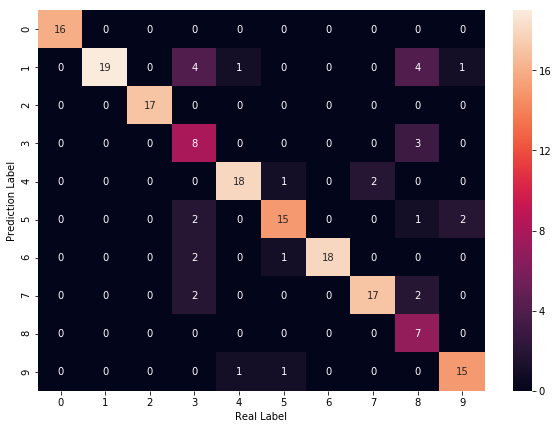

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:21 index:[5] real:5
#1 min_error:30 index:[2] real:2
#2 min_error:33 index:[7] real:8
#3 min_error:8 index:[0] real:0
#4 min_error:17 index:[1] real:1
#5 min_error:20 index:[7] real:7
#6 min_error:20 index:[6] real:6
#7 min_error:23 index:[3] real:3
#8 min_error:13 index:[2] real:2
#9 min_error:18 index:[1] real:1
#10 min_error:29 index:[7] real:7
#11 min_error:33 index:[1] real:4
#12 min_error:11 index:[6] real:6
#13 min_error:25 index:[3] real:3
#14 min_error:14 index:[1] real:1
#15 min_error:30 index:[1] real:3
#16 min_error:31 index:[9] real:9
#17 min_error:19 index:[1] real:1
#18 min_error:34 index:[7] real:7
#19 min_error:12 index:[6] real:6
#20 min_error:28 index:[8] real:8
#21 min_error:7 index:[4] real:4
#22 min_error:22 index:[3] real:3
#23 min_error:21 index:[1] real:1
#24 min_error:14 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:20 index:[5] real:5
#27 min_error:21 index:[3] real:3
#28 min_error:27 index:[6] real:6
#29 min_error:23 index:[9]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.87569573283859
Avg Base Learner:0.8055225726654298


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2126 Total connections::2657


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8444444444444444